In [99]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [100]:
#read in csv and save as Dataframe
steph = pd.read_csv('/Users/mac/CLASS/Bron23/nba_data/3_stephen_curry_shot_chart_2023.csv')
bron = pd.read_csv('/Users/mac/CLASS/Bron23/nba_data/1_lebron_james_shot_chart_1_2023.csv')
steph_df = pd.DataFrame(steph)
bron_df = pd.DataFrame(bron)

In [101]:
# Display dataframe first five rows
steph_df.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,63,300,"Oct 18, 2022",1st Qtr,7:27,False,2,6,True,9,6,LAL,GSW,2023,red
1,133,389,"Oct 18, 2022",1st Qtr,7:22,True,2,17,True,11,6,LAL,GSW,2023,green
2,326,247,"Oct 18, 2022",1st Qtr,7:11,False,3,27,True,11,6,LAL,GSW,2023,red
3,249,89,"Oct 18, 2022",1st Qtr,5:16,False,3,25,True,19,13,LAL,GSW,2023,red
4,282,158,"Oct 18, 2022",1st Qtr,3:52,False,3,24,True,22,17,LAL,GSW,2023,red


In [102]:
# Display Lebron Dataframe
bron_df.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,310,203,"Oct 18, 2022",1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red
1,213,259,"Oct 18, 2022",1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red
2,143,171,"Oct 18, 2022",1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red
3,68,215,"Oct 18, 2022",1st Qtr,05:24,True,2,3,False,12,19,GSW,LAL,2023,green
4,66,470,"Oct 18, 2022",1st Qtr,01:02,False,3,23,False,22,23,GSW,LAL,2023,red


In [103]:
steph_df.info()  #read dataframe for dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   top                  1434 non-null   int64 
 1   left                 1434 non-null   int64 
 2   date                 1434 non-null   object
 3   qtr                  1434 non-null   object
 4   time_remaining       1434 non-null   object
 5   result               1434 non-null   bool  
 6   shot_type            1434 non-null   int64 
 7   distance_ft          1434 non-null   int64 
 8   lead                 1434 non-null   bool  
 9   lebron_team_score    1434 non-null   int64 
 10  opponent_team_score  1434 non-null   int64 
 11  opponent             1434 non-null   object
 12  team                 1434 non-null   object
 13  season               1434 non-null   int64 
 14  color                1434 non-null   object
dtypes: bool(2), int64(7), object(6)
memory usage: 148.6+ KB

In [104]:
bron_df.info() #read dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   top                  1533 non-null   int64 
 1   left                 1533 non-null   int64 
 2   date                 1533 non-null   object
 3   qtr                  1533 non-null   object
 4   time_remaining       1533 non-null   object
 5   result               1533 non-null   bool  
 6   shot_type            1533 non-null   int64 
 7   distance_ft          1533 non-null   int64 
 8   lead                 1533 non-null   bool  
 9   lebron_team_score    1533 non-null   int64 
 10  opponent_team_score  1533 non-null   int64 
 11  opponent             1533 non-null   object
 12  team                 1533 non-null   object
 13  season               1533 non-null   int64 
 14  color                1533 non-null   object
dtypes: bool(2), int64(7), object(6)
memory usage: 158.8+ KB

In [105]:
steph_df.isnull().sum() #check for any null values


top                    0
left                   0
date                   0
qtr                    0
time_remaining         0
result                 0
shot_type              0
distance_ft            0
lead                   0
lebron_team_score      0
opponent_team_score    0
opponent               0
team                   0
season                 0
color                  0
dtype: int64

In [106]:
bron_df.isnull().sum() #checlk for any null values

top                    0
left                   0
date                   0
qtr                    0
time_remaining         0
result                 0
shot_type              0
distance_ft            0
lead                   0
lebron_team_score      0
opponent_team_score    0
opponent               0
team                   0
season                 0
color                  0
dtype: int64

In [107]:
#Create dataframe focus on shots location and whether winning or losing

steph_df_shots = steph_df[['qtr','lead','time_remaining','shot_type','distance_ft', 'top','left', 'result']]
steph_df_shots.head()



,qtr,lead,time_remaining,shot_type,distance_ft,top,left,result
0,1st Qtr,True,7:27,2,6,63,300,False
1,1st Qtr,True,7:22,2,17,133,389,True
2,1st Qtr,True,7:11,3,27,326,247,False
3,1st Qtr,True,5:16,3,25,249,89,False
4,1st Qtr,True,3:52,3,24,282,158,False


In [108]:
#change lead and result into numerical data
steph_df_shots[['result', 'lead']] = steph_df_shots[['result','lead']].astype(int)

/var/folders/bp/ghj2hg8n63ngp97nh99m0cr80000gn/T/ipykernel_1523/112553723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_df_shots[['result', 'lead']] = steph_df_shots[['result','lead']].astype(int)


In [109]:
#Create dataframe focus on shots location and whether winning or losing
bron_df_shots = bron_df[['qtr','lead','time_remaining','shot_type','distance_ft', 'top','left', 'result']]
bron_df_shots.head()

,qtr,lead,time_remaining,shot_type,distance_ft,top,left,result
0,1st Qtr,False,09:26,3,26,310,203,False
1,1st Qtr,False,08:38,2,16,213,259,False
2,1st Qtr,False,08:10,2,11,143,171,False
3,1st Qtr,False,05:24,2,3,68,215,True
4,1st Qtr,False,01:02,3,23,66,470,False


In [110]:
bron_df_shots[['result', 'lead']] = bron_df_shots[['result','lead']].astype(int)

/var/folders/bp/ghj2hg8n63ngp97nh99m0cr80000gn/T/ipykernel_1523/4077506116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bron_df_shots[['result', 'lead']] = bron_df_shots[['result','lead']].astype(int)


In [111]:
# create dataframe that focuses on 4th quarter shots
steph_in_4th = steph_df_shots[steph_df_shots['qtr'] == '4th Qtr']
steph_in_4th.head()

,qtr,lead,time_remaining,shot_type,distance_ft,top,left,result
16,4th Qtr,1,6:23,3,25,264,111,0
17,4th Qtr,1,4:01,3,25,151,10,1
18,4th Qtr,1,3:33,2,1,59,233,1
19,4th Qtr,1,3:15,3,25,304,268,1
20,4th Qtr,1,2:46,3,25,248,398,0


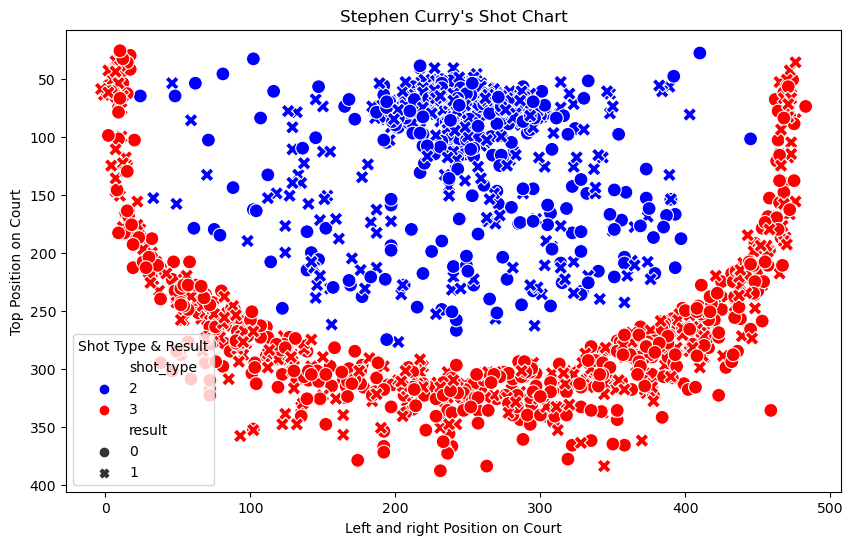

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with color for shot type and marker shape for result
sns.scatterplot(
    data=steph_df_shots,
    x="left",  # X-axis: left position
    y="top",   # Y-axis: top position
    hue="shot_type",  # Color by shot type (2 or 3)
    style="result",  # Different markers for "made" vs. "missed"
    palette={2: "blue", 3: "red"},  # Blue for 2PT, Red for 3PT
    s=100  # Size of points
)

plt.title("Stephen Curry's Shot Chart")
plt.xlabel("Left and right Position on Court")
plt.ylabel("Top Position on Court")
plt.legend(title="Shot Type & Result")
plt.gca().invert_yaxis()  # Invert Y-axis so top of court is at top of graph
plt.show()


In [113]:
steph_in_4th_3pt = steph_df_shots[steph_df_shots['shot_type'] == 3]
steph_in_4th_3pt.describe()

,lead,shot_type,distance_ft,top,left,result
count,786.000000,786.0,786.000000,786.000000,786.000000,786.000000
mean,0.493639,3.0,26.849873,259.993639,246.375318,0.418575
std,0.500278,0.0,2.178144,76.581308,151.696639,0.493640
min,0.000000,3.0,22.000000,26.000000,-3.000000,0.000000
25%,0.000000,3.0,26.000000,235.000000,96.250000,0.000000
50%,0.000000,3.0,27.000000,281.000000,256.500000,0.000000
75%,1.000000,3.0,28.000000,312.000000,384.750000,1.000000
max,1.000000,3.0,36.000000,388.000000,483.000000,1.000000


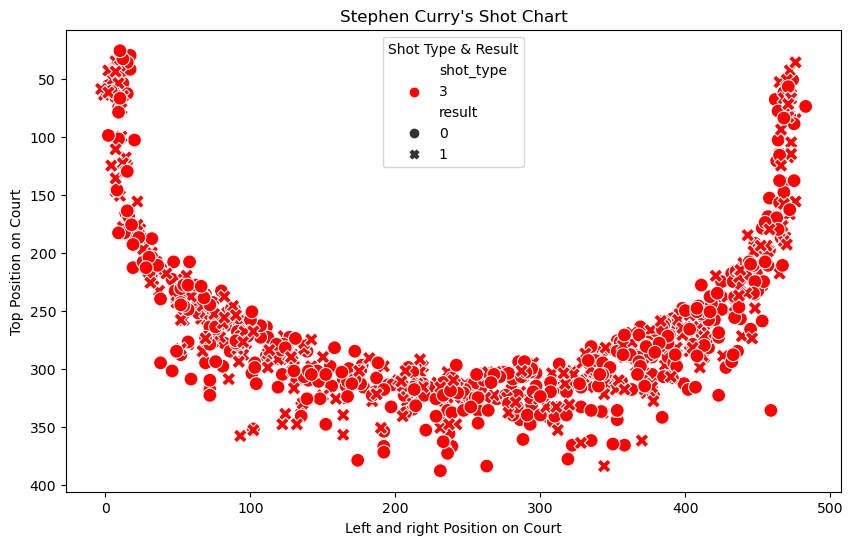

In [114]:

plt.figure(figsize=(10, 6))

# Scatter plot with color for shot type and marker shape for result
sns.scatterplot(
    data=steph_in_4th_3pt,
    x="left",  # X-axis: left position
    y="top",   # Y-axis: top position
    hue="shot_type",  # Color by shot type (2 or 3)
    style="result",  # Different markers for "made" vs. "missed"
    palette={3: "red"},  # Blue for 2PT, Red for 3PT
    s=100  # Size of points
)

plt.title("Stephen Curry's Shot Chart")
plt.xlabel("Left and right Position on Court")
plt.ylabel("Top Position on Court")
plt.legend(title="Shot Type & Result")
plt.gca().invert_yaxis()  # Invert Y-axis so top of court is at top of graph
plt.show()

In [115]:
steph_in_4th_2pt = steph_df_shots[steph_df_shots['shot_type'] == 2]
steph_in_4th_2pt.describe()

,lead,shot_type,distance_ft,top,left,result
count,648.000000,648.0,648.000000,648.000000,648.000000,648.000000
mean,0.515432,2.0,8.175926,109.188272,246.608025,0.577160
std,0.500148,0.0,6.394059,57.514719,63.287309,0.494392
min,0.000000,2.0,0.000000,28.000000,24.000000,0.000000
25%,0.000000,2.0,3.000000,67.000000,215.000000,0.000000
50%,1.000000,2.0,5.000000,82.500000,248.000000,1.000000
75%,1.000000,2.0,13.000000,145.250000,282.000000,1.000000
max,1.000000,2.0,23.000000,277.000000,445.000000,1.000000


In [116]:
steph_in_4th.describe()

,lead,shot_type,distance_ft,top,left,result
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.471053,2.568421,19.042105,196.434211,251.536842,0.486842
std,0.499819,0.495949,10.127593,102.225027,122.015035,0.500486
min,0.000000,2.000000,0.000000,30.000000,2.000000,0.000000
25%,0.000000,2.000000,7.000000,84.000000,173.500000,0.000000
50%,0.000000,3.000000,25.000000,220.500000,252.500000,0.000000
75%,1.000000,3.000000,27.000000,289.250000,340.000000,1.000000
max,1.000000,3.000000,35.000000,384.000000,483.000000,1.000000


In [117]:
# Create DataFrame focues on Lebrons shot in the 4th quarter
bron_in_4th = bron_df_shots[bron_df_shots['qtr']== '4th Qtr']
bron_in_4th.head()

,qtr,lead,time_remaining,shot_type,distance_ft,top,left,result
20,4th Qtr,0,11:44,3,25,251,397,0
21,4th Qtr,0,10:27,2,1,63,241,1
22,4th Qtr,0,09:49,3,25,290,152,0
23,4th Qtr,0,09:04,2,0,53,240,1
24,4th Qtr,0,03:46,3,24,70,476,1


In [118]:
bron_in_4th.describe()

,lead,shot_type,distance_ft,top,left,result
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.530000,2.360000,13.247500,155.145000,230.817500,0.465000
std,0.499724,0.480601,11.066726,101.563956,92.053293,0.499398
min,0.000000,2.000000,0.000000,36.000000,4.000000,0.000000
25%,0.000000,2.000000,2.750000,66.000000,193.000000,0.000000
50%,1.000000,2.000000,9.000000,105.000000,240.000000,0.000000
75%,1.000000,3.000000,26.000000,263.000000,259.000000,1.000000
max,1.000000,3.000000,34.000000,389.000000,476.000000,1.000000


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


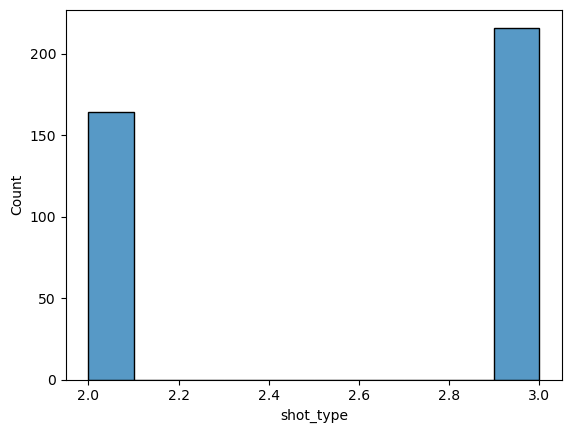

<Figure size 1500x400 with 0 Axes>

In [119]:
# Visualize 4th qtr shot type Steph 

sns.histplot(steph_in_4th['shot_type'])
plt.figure(figsize=(15,4))
n = 1 + 130


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


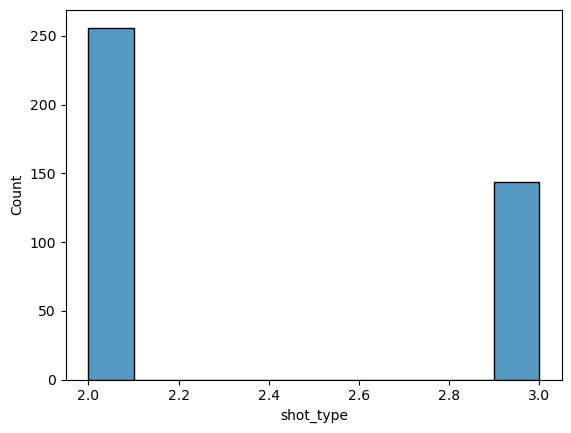

<Figure size 1500x400 with 0 Axes>

In [120]:
#lebron 4th quarter shot types
sns.histplot(bron_in_4th['shot_type'])
plt.figure(figsize=(15,4))
n = 1 + 130